# <center> Final Project Text Analysis </center>

In [84]:
import pandas as pd

# load dataframe from CSV file
data = pd.read_csv('data/tobacco-lab_data_Tobacco3482.csv')

In [85]:
#on verifie qu'il y a pas de valeur manquante
data.count()

img_path    3482
label       3482
dtype: int64

In [86]:
data.head(5)

,img_path,label
0,Advertisement/0000136188.jpg,Advertisement
1,Advertisement/0000435350.jpg,Advertisement
2,Advertisement/0000556056.jpg,Advertisement
3,Advertisement/0030048095.jpg,Advertisement
4,Advertisement/0030048989.jpg,Advertisement


#### on cherche a predire les classes a partir des fichiers text. On remarque qu'on a les liens vers les fichiers photos et pas text. Par contre ils ont le meme nom sauf l'extension donc il suffit de changer '.jpg' par '.txt' pour pouvoir lire les fichiers text. Ensuite, on remplace le lien vers les text par le text qui correspond comme suit:

In [87]:
nbr = data.shape[0]

for i in range (nbr):
    a = data.get_value(i, 'img_path')
    data.set_value(i, 'img_path', 'data/Tobacco3482-OCR/'+a)
    data.set_value(i, 'img_path', data.get_value(i, 'img_path').split('.jpg')[0]+'.txt')
    data.set_value(i, 'img_path',open(data.get_value(i, 'img_path'), "r").read())

/Users/Akli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
/Users/Akli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
/Users/Akli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Users/Akli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Users/Akli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: get_value is deprecated and will be removed in a future re

#### On change le nom des columns en text et label

In [88]:
data.columns = ['text','label']

# Partie statistique:

#### On affiche les repartitions des classes

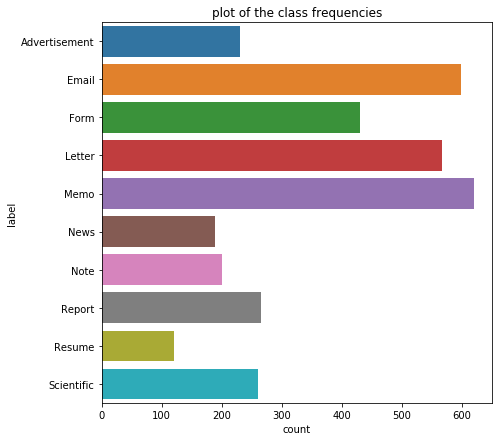

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the statistics of category
plt.figure(1,figsize = (7,7))
plt.title("plot of the class frequencies")
sns.countplot(data=data,y='label')

#### On peut faire aussi afficher en camembert

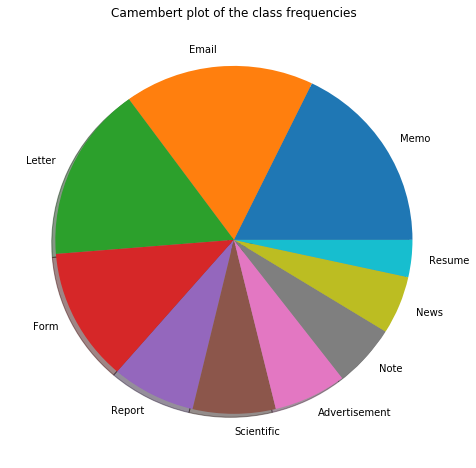

In [90]:
counts =data["label"].value_counts()
plt.figure(2,figsize = (8,8))
plt.title("Camembert plot of the class frequencies")
plt.pie(counts,labels = counts.index,shadow = True)
plt.show()

#### On remarque que les donnees ne sont pas vraiment desequilibres  malgres que les classes memo email letter et form representent plus de la moitie. mais on peut dire qu'on aura meilleur classification pour les classes les plus representees

#### On aimerait afficher nos donnees pour avoir une idee de qui il s'agit donc on affiche un exemple 

In [91]:
# Print examples of the articles
print(data.head())
data.iloc[15].text

                                                text          label
0  A Mpertant as yar\nsesiye teaetered cabiieess....  Advertisement
1  TE che fitm\n\nm66400 7127\n\nKOOLS are the on...  Advertisement
2  so ARN Rr nr\n\nBWR Ga ||\n\nVending Operators...  Advertisement
3  MARCH 24,19 VO — 3. Tersrearep\n\n \n\n‘ yi il...  Advertisement
4  ~\n\nSpend a milder moment qs\nwith Raleigh.\n...  Advertisement


'- 4 lovap moan... o-fot of cigarette\n\n“He gets.a lot to like—filter, flavor, flip-top box.’’ The works.\n~ A filter that means business. An easy draw that’s all\nflavor, And the flip-top box that ends crushed cigarettes.\n\ni\nI\n~ hoe ‘(MADE IN RICHMOND, VIRGINIA, FROM .A PRIZED RECIPE)\n\n~ aay'

# Partie Machine learning

### Separation des donnees en donnees d'apprentissage et donnees de test

##### Puisque on a 3482 individues donc il est mieux de les separer en 60% dapprentissage 20% de validation et 20% de test

In [92]:
from sklearn.model_selection import train_test_split
# Split the dataset, create X (features) and y (target), print the size
(X_train,X_test,y_train,y_test) = train_test_split(data['text'],data['label'],test_size=0.2)
(X_train1,X_dev,y_train1,y_dev) = train_test_split(X_train,y_train,test_size=0.25)

In [93]:
print('train data size=',X_train1.shape[0],'X_test data size=',X_test.shape[0],'dev data size=',X_dev.shape[0])

train data size= 2088 X_test data size= 697 dev data size= 697


#### Pour appliquer des algorithmes d'apprentissage automatique au texte, les documents doivent être transformés en vecteurs. Le moyen le plus simple de transformer un document en vecteur est Le Bag of Word BoG

#### Dans un premier temps on utilise CountVectorizer dont le principe est de creer un dictionnaire de mot contenant dans la base d'apprentissage puis compter le nombre de fois qu'un mot apparaisse dans un document pour creer le vecteur qui represente chaque document. Puis on garde que les 2000 mot qui apparaisse le plus (max_features=2000) pour cet exemple

In [94]:
from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors
vectorizer = CountVectorizer(max_features=2000)
vectorizer.fit(X_train1)
X_train_counts = vectorizer.transform(X_train1)
X_dev_counts = vectorizer.transform(X_dev)
X_test_counts = vectorizer.transform(X_test)

### On applique algorithme de Naive Bayes

In [96]:
# train a Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_counts, y_train1)
print('Accuracy pour les donnees d apprentissage = ',clf.score(X_train_counts, y_train1))
print('Accuracy pour les donnees de validation =   ',clf.score(X_dev_counts, y_dev))
print('Accuracy pour les donnees de test =         ',clf.score(X_test_counts, y_test))
y_pred_counts = clf.predict(X_test_counts)


Accuracy pour les donnees d apprentissage =  0.8304597701149425
Accuracy pour les donnees de validation =    0.7403156384505022
Accuracy pour les donnees de test =          0.7015781922525107


#### Une autre methode pour vectorizer nos donnees est TFIDF qui prend en compte le nombre de documents dans lesquels un mot donné apparaît. Un mot qui apparaît dans de nombreux documents aura moins de poids

In [97]:
from sklearn.feature_extraction.text import TfidfTransformer
# YOUR CODE HERE
tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_dev_tf = tf_transformer.transform(X_dev_counts)
X_test_tf = tf_transformer.transform(X_test_counts)

In [98]:
# train a Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_tf, y_train1)
print(clf.score(X_train_tf, y_train1))
print(clf.score(X_dev_tf, y_dev))
print(clf.score(X_test_tf, y_test))
y_pred_tf = clf.predict(X_test_tf)


0.742816091954023
0.6571018651362984
0.642754662840746


#### On obtient des resultats moins bons avec TFIDF

### On peut voir plus en detail les resultats avec la matrice de confusion 

In [99]:
from sklearn.metrics import confusion_matrix
confusion_counts = confusion_matrix(y_test,y_pred_counts)
confusion_tf = confusion_matrix(y_test,y_pred_tf)
print('Matrice de confusion(CountVectorizer):\n',confusion_counts)
print('Matrice de confusion(TfidfTransformer) :\n',confusion_tf)

Matrice de confusion(CountVectorizer):
 [[33  1  3  4  6  2  1  0  0  0]
 [ 0 98  0  5  2  0  0  0  0  0]
 [ 6  2 63  1  4  1  2  1  0  1]
 [ 0  0  3 82 17  3  0 14  0  2]
 [ 2  8  3 13 94  1  2  2  0  1]
 [ 5  0  1  1  1 32  0  0  0  1]
 [ 4  4  7  1 11  0  9  0  0  0]
 [ 1  1  1  4  9  7  1 20  0  9]
 [ 0  0  0  0  0  0  0  0 19  0]
 [ 3  0 10  3  3  3  2  1  1 39]]
Matrice de confusion(TfidfTransformer) :
 [[ 23   1   8   3  15   0   0   0   0   0]
 [  0  98   0   3   4   0   0   0   0   0]
 [  0   4  63   0  13   0   0   0   0   1]
 [  0   0   0  82  38   0   0   0   0   1]
 [  0   7   1  10 108   0   0   0   0   0]
 [  1   0   5   7   6  21   0   0   0   1]
 [  0   6  13   2  15   0   0   0   0   0]
 [  0   1   0  12  30   2   0   2   0   6]
 [  0   0   0   0   0   0   0   0  19   0]
 [  0   0  12  10  11   0   0   0   0  32]]


### Pour voir plus en detail pour chaque classe

In [100]:
from sklearn.metrics import classification_report
report_counts = classification_report(y_test,y_pred_counts)
report_tf = classification_report(y_test,y_pred_tf)
print(report_counts)
print(report_tf)

               precision    recall  f1-score   support

Advertisement       0.61      0.66      0.63        50
        Email       0.86      0.93      0.89       105
         Form       0.69      0.78      0.73        81
       Letter       0.72      0.68      0.70       121
         Memo       0.64      0.75      0.69       126
         News       0.65      0.78      0.71        41
         Note       0.53      0.25      0.34        36
       Report       0.53      0.38      0.44        53
       Resume       0.95      1.00      0.97        19
   Scientific       0.74      0.60      0.66        65

  avg / total       0.69      0.70      0.69       697

               precision    recall  f1-score   support

Advertisement       0.96      0.46      0.62        50
        Email       0.84      0.93      0.88       105
         Form       0.62      0.78      0.69        81
       Letter       0.64      0.68      0.66       121
         Memo       0.45      0.86      0.59       126
      

/Users/Akli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Maintenat On cherche a determiner les meilleur parametre

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors
vectorizer = CountVectorizer(max_features=2000)
vectorizer.fit(X_train)
X_train_counts = vectorizer.transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [71]:
from sklearn import  model_selection
parameters = {'alpha' : [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 9.0, 10.0]}
clf = MultinomialNB()
grid = model_selection.GridSearchCV(clf, parameters, cv = 5)
grid.fit(X_train_counts, y_train)
print('best parameter is',grid.best_params_, 'with score of ', grid.best_score_)

/Users/Akli/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/Akli/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/Akli/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/Akli/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/Akli/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_

best parameter is {'alpha': 1.0} with score of  0.7210053859964093


In [101]:
# Deep learning

In [81]:
import ast
import os
from nn_utils import TrainingHistory
from keras.layers import Dense, Embedding, Input
from keras.layers import GRU, Dropout, MaxPooling1D, Conv1D, Flatten, LSTM
from keras.models import Model
import numpy as np
import itertools
from keras.utils import np_utils
from sklearn.metrics import (classification_report, 
                             precision_recall_fscore_support, 
                             accuracy_score)

from keras.preprocessing import text, sequence



In [82]:
# Model parameters
MAX_FEATURES = 2000
MAX_TEXT_LENGTH = 2000
EMBED_SIZE  = 200
BATCH_SIZE = 16
EPOCHS = 15
VALIDATION_SPLIT = 0.1

In [83]:
from nn_utils import TrainingHistory

def get_train_test(train_raw_text, test_raw_text):
    
    tokenizer = text.Tokenizer(num_words=MAX_FEATURES)

    tokenizer.fit_on_texts(list(train_raw_text))
    train_tokenized = tokenizer.texts_to_sequences(train_raw_text)
    test_tokenized = tokenizer.texts_to_sequences(test_raw_text)
    return sequence.pad_sequences(train_tokenized, maxlen=MAX_TEXT_LENGTH), \
           sequence.pad_sequences(test_tokenized, maxlen=MAX_TEXT_LENGTH)

def get_model():

    inp = Input(shape=(MAX_TEXT_LENGTH,))
    model = Embedding(MAX_TEXT_LENGTH,EMBED_SIZE)(inp)
    model = Dropout(0.4)(model)
    model = Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(model)
    model = MaxPooling1D(pool_size=2)(model)
    model = Dropout(0.4)(model)
    model = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(model)
    model = MaxPooling1D(pool_size=2)(model)
    model = Dropout(0.25)(model)
    model = LSTM(50)(model)
    model = Dense(10, activation="softmax")(model)
    model = Model(inputs=inp, outputs=model)
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

def train_fit_predict(model, x_train, x_test, y, history):
    
    model.fit(x_train, y,
              batch_size=BATCH_SIZE,
              epochs=EPOCHS, verbose=1,
              validation_split=VALIDATION_SPLIT)

    return model.predict(x_test)


# Get the list of different classes
CLASSES_LIST = np.unique(y_train)
n_out = len(CLASSES_LIST)
print(CLASSES_LIST)

# Convert clas string to index
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(CLASSES_LIST)
y_train = le.transform(y_train) 
y_test = le.transform(y_test) 
train_y_cat = np_utils.to_categorical(y_train, n_out)

# get the textual data in the correct format for NN
x_vec_train, x_vec_test = get_train_test(X_train, X_test)
print(len(x_vec_train), len(x_vec_test))

# define the NN topology
model = get_model()

# Define training procedure
history = TrainingHistory(x_vec_test, y_test, CLASSES_LIST)

# Train and predict
y_predicted = train_fit_predict(model, x_vec_train, x_vec_test, train_y_cat, history).argmax(1)


print("Test Accuracy:", accuracy_score(y_test, y_predicted))

p, r, f1, s = precision_recall_fscore_support(y_test, y_predicted, 
                                              average='micro',
                                              labels=[x for x in 
                                                      np.unique(y_train) 
                                                      if x not in ['CSDECMOTV']])

print('p r f1 %.1f %.2f %.3f' % (np.average(p, weights=s)*100.0, 
                                 np.average(r, weights=s)*100.0, 
                                 np.average(f1, weights=s)*100.0))


print(classification_report(y_test, y_predicted, labels=[x for x in 
                                                       np.unique(y_train) 
                                                       if x not in ['CSDECMOTV']]))

[0 1 2 3 4 5 6 7 8 9]
2785 697
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 2000)              0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 2000, 200)         400000    
_________________________________________________________________
dropout_11 (Dropout)         (None, 2000, 200)         0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 2000, 32)          19232     
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 1000, 32)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 1000, 32)          0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 1000, 64)